1. Integrazione



Per ciascun gruppo di dati hai 2 tabelle titles. Procedi con i seguenti passi:
- Fai join tra queste 2 tabelle per ottenere una tabella integrata
- Crea una nuova tabella <piattaforma>_titles_combinata.csv ottenuta a partire da <piattaforma>_titles_1.csv ed aggiungendo le colonne date_added e country che trovi in <piattaforma>_titles_2.csv
- Fai join tra la tabella ottenuta e la tabella credits
- Procedi con la pulizia dei dati: elimina colonne inutili o ripetute, righe non significative, gestisci la presenza di eventuali valori nulli o mancanti, ecc...
Dopo aver preparato i due dataset, puoi decidere di concatenarli per ottenerne uno unico, oppure mantenerli separati.

In [103]:
#importiamo pandas ed altro che ci servirà più avanti
import pandas as pd
import numpy as np 
import math
import matplotlib.pyplot as plt

In [104]:
#carichiamo i dati netflix
netflix_titles_1 = pd.read_csv("netflix_titles_1.csv")
netflix_titles_2 = pd.read_csv("netflix_titles_2.csv")
netfilx_credits = pd.read_csv("netflix_credits.csv")


In [105]:
#visualizziamo 
netflix_titles_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017 entries, 0 to 6016
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6017 non-null   object 
 1   title                 6017 non-null   object 
 2   type                  6017 non-null   object 
 3   description           5995 non-null   object 
 4   release_year          6017 non-null   int64  
 5   age_certification     3356 non-null   object 
 6   runtime               6017 non-null   int64  
 7   genres                6017 non-null   object 
 8   production_countries  6017 non-null   object 
 9   seasons               2261 non-null   float64
 10  imdb_id               5626 non-null   object 
 11  imdb_score            5557 non-null   float64
 12  imdb_votes            5541 non-null   float64
 13  tmdb_popularity       5939 non-null   float64
 14  tmdb_score            5793 non-null   float64
dtypes: float64(5), int64(

In [106]:
netflix_titles_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [107]:
netflix_titles_1.head()


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.601,NaN
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['romance', 'drama', 'sport']",['US'],NaN,tt0075148,8.1,592629.0,86.593,7.784
2,tm47802,Psycho,MOVIE,When larcenous real estate clerk Marion Crane ...,1960,R,109,"['thriller', 'horror', 'drama']",['US'],NaN,tt0054215,8.5,681931.0,31.106,8.446
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,548657.0,22.267,7.804
4,tm25479,The Birds,MOVIE,Chic socialite Melanie Daniels enjoys a passin...,1963,NaN,113,"['horror', 'drama', 'romance', 'european']",['US'],NaN,tt0056869,7.6,193901.0,22.930,7.519


In [108]:
netflix_titles_2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Il codice combina due tabelle di dati, viene creato poi un nuovo dataframe "integrated_netflix" che unisce i due dataframe uno sopra l'altro.
usando il merge uniamo le due tabelle usando come chiave di join "id" della prima tabella e "show_id" della seconda per creare un nuovo df che chiamiamo "final_table".

Usare un outer join ci assicura l'inserimento di tutti gli elementi di entrambe le tabelle anche se non vi è una corrispondeza nella tabella opposta


In [109]:
netflix_titles_combinata= pd.merge(netflix_titles_1,netflix_titles_2, left_on= ['title','release_year'], right_on= ['title','release_year'])

In [110]:
#visualizziamo
netflix_titles_combinata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2791 entries, 0 to 2790
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2791 non-null   object 
 1   title                 2791 non-null   object 
 2   type_x                2791 non-null   object 
 3   description_x         2786 non-null   object 
 4   release_year          2791 non-null   int64  
 5   age_certification     1409 non-null   object 
 6   runtime               2791 non-null   int64  
 7   genres                2791 non-null   object 
 8   production_countries  2791 non-null   object 
 9   seasons               904 non-null    float64
 10  imdb_id               2590 non-null   object 
 11  imdb_score            2560 non-null   float64
 12  imdb_votes            2556 non-null   float64
 13  tmdb_popularity       2767 non-null   float64
 14  tmdb_score            2714 non-null   float64
 15  show_id              

In [111]:
#nella tabella "netflix_titles_combinata" andiamo a togliere le colonne che non ci interessano.
netflix_titles_combinata= netflix_titles_combinata.drop(['show_id','type_y', 'director' ,'description_y','listed_in', 'duration', 'rating', 'cast' ], axis=1)

#visualizziamo le informazioni della tabella per verificare di aver rimosso correttamente le colonne.
netflix_titles_combinata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2791 entries, 0 to 2790
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2791 non-null   object 
 1   title                 2791 non-null   object 
 2   type_x                2791 non-null   object 
 3   description_x         2786 non-null   object 
 4   release_year          2791 non-null   int64  
 5   age_certification     1409 non-null   object 
 6   runtime               2791 non-null   int64  
 7   genres                2791 non-null   object 
 8   production_countries  2791 non-null   object 
 9   seasons               904 non-null    float64
 10  imdb_id               2590 non-null   object 
 11  imdb_score            2560 non-null   float64
 12  imdb_votes            2556 non-null   float64
 13  tmdb_popularity       2767 non-null   float64
 14  tmdb_score            2714 non-null   float64
 15  country              

In [112]:
netfilx_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80193 entries, 0 to 80192
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  80193 non-null  int64 
 1   id         80193 non-null  object
 2   name       80193 non-null  object
 3   character  69760 non-null  object
 4   role       80193 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.1+ MB


In [113]:
#join tra netflix_titles_combinata e tabella credits

netflix_titles_combinata= pd.merge(netflix_titles_combinata,netfilx_credits, how='inner', left_on='id', right_on='id')

netflix_titles_combinata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38653 entries, 0 to 38652
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38653 non-null  object 
 1   title                 38653 non-null  object 
 2   type_x                38653 non-null  object 
 3   description_x         38642 non-null  object 
 4   release_year          38653 non-null  int64  
 5   age_certification     20575 non-null  object 
 6   runtime               38653 non-null  int64  
 7   genres                38653 non-null  object 
 8   production_countries  38653 non-null  object 
 9   seasons               6743 non-null   float64
 10  imdb_id               37041 non-null  object 
 11  imdb_score            36831 non-null  float64
 12  imdb_votes            36800 non-null  float64
 13  tmdb_popularity       38653 non-null  float64
 14  tmdb_score            38361 non-null  float64
 15  country            

In [114]:
#verifichiamo i valori nulli
print(netflix_titles_combinata.isnull().sum())

id                          0
title                       0
type_x                      0
description_x              11
release_year                0
age_certification       18078
runtime                     0
genres                      0
production_countries        0
seasons                 31910
imdb_id                  1612
imdb_score               1822
imdb_votes               1853
tmdb_popularity             0
tmdb_score                292
country                  2878
date_added                  0
person_id                   0
name                        0
character                4768
role                        0
dtype: int64


In [115]:
#uniamo le colonne country e production countries
index= netflix_titles_combinata['production_countries'].notnull()
values= netflix_titles_combinata['production_countries'][index]
# andiamo a copiare questi elementi nella colonna country
netflix_titles_combinata.loc[index, 'country'] = values
#ed eliminiamo quella che non ci serve più
netflix_titles_combinata = netflix_titles_combinata.drop(columns= ['production_countries'])

# Abbiamo unito le colonne, ora unifichiamo lo stile
for i in range(len(netflix_titles_combinata['title'])):
    s = str(netflix_titles_combinata['country'].iloc[i][2:-2])
    news = s.replace("'", "")
    x = news.split(", ")


In [116]:
#controlliamo che quello che abbiamo fatto sopra sia corretto
print(netflix_titles_combinata['country'])

0        ['US']
1        ['US']
2        ['US']
3        ['US']
4        ['US']
          ...  
38648    ['ES']
38649    ['IN']
38650    ['IN']
38651    ['IN']
38652    ['IN']
Name: country, Length: 38653, dtype: object


In [117]:
netflix_titles_combinata['country'].info()

<class 'pandas.core.series.Series'>
Int64Index: 38653 entries, 0 to 38652
Series name: country
Non-Null Count  Dtype 
--------------  ----- 
38653 non-null  object
dtypes: object(1)
memory usage: 604.0+ KB


In [118]:
#verifichiamo i valori nulli
print(netflix_titles_combinata.isnull().sum())


id                       0
title                    0
type_x                   0
description_x           11
release_year             0
age_certification    18078
runtime                  0
genres                   0
seasons              31910
imdb_id               1612
imdb_score            1822
imdb_votes            1853
tmdb_popularity          0
tmdb_score             292
country                  0
date_added               0
person_id                0
name                     0
character             4768
role                     0
dtype: int64


In [119]:
#rimuoviamo i duplicati
netflix_titles_combinata.drop_duplicates()

,id,title,type_x,description_x,release_year,age_certification,runtime,genres,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,country,date_added,person_id,name,character,role
0,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['romance', 'drama', 'sport']",NaN,tt0075148,8.1,592629.0,86.593,7.784,['US'],"August 1, 2019",3180,Sylvester Stallone,"Robert ""Rocky"" Balboa",ACTOR
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['romance', 'drama', 'sport']",NaN,tt0075148,8.1,592629.0,86.593,7.784,['US'],"August 1, 2019",7748,Talia Shire,"Adrianna ""Adrian"" Pennino",ACTOR
2,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['romance', 'drama', 'sport']",NaN,tt0075148,8.1,592629.0,86.593,7.784,['US'],"August 1, 2019",7749,Burt Young,Paulie Pennino,ACTOR
3,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['romance', 'drama', 'sport']",NaN,tt0075148,8.1,592629.0,86.593,7.784,['US'],"August 1, 2019",7750,Carl Weathers,Apollo Creed,ACTOR
4,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['romance', 'drama', 'sport']",NaN,tt0075148,8.1,592629.0,86.593,7.784,['US'],"August 1, 2019",7751,Burgess Meredith,Mickey Goldmill,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38648,ts285874,Magic for Humans Spain,SHOW,"In this Spanish adaptation of ""Magic for Human...",2021,TV-MA,23,"['reality', 'comedy']",1.0,tt14136320,6.0,86.0,1.896,3.800,['ES'],"March 26, 2021",1843374,Antonio Díaz,Self,ACTOR
38649,tm828570,Ahaan,MOVIE,"Jilted by his wife, a man with OCD finds eye o...",2021,NaN,81,"['comedy', 'drama']",NaN,tt10833732,7.0,346.0,1.868,6.000,['IN'],"May 15, 2021",63458,Arif Zakaria,Ozzy,ACTOR
38650,tm828570,Ahaan,MOVIE,"Jilted by his wife, a man with OCD finds eye o...",2021,NaN,81,"['comedy', 'drama']",NaN,tt10833732,7.0,346.0,1.868,6.000,['IN'],"May 15, 2021",178315,Niharika Singh,Anu,ACTOR
38651,tm828570,Ahaan,MOVIE,"Jilted by his wife, a man with OCD finds eye o...",2021,NaN,81,"['comedy', 'drama']",NaN,tt10833732,7.0,346.0,1.868,6.000,['IN'],"May 15, 2021",1913445,Abuli Mamaji,Ahaan,ACTOR


In [120]:
display(netflix_titles_combinata)

,id,title,type_x,description_x,release_year,age_certification,runtime,genres,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,country,date_added,person_id,name,character,role
0,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['romance', 'drama', 'sport']",NaN,tt0075148,8.1,592629.0,86.593,7.784,['US'],"August 1, 2019",3180,Sylvester Stallone,"Robert ""Rocky"" Balboa",ACTOR
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['romance', 'drama', 'sport']",NaN,tt0075148,8.1,592629.0,86.593,7.784,['US'],"August 1, 2019",7748,Talia Shire,"Adrianna ""Adrian"" Pennino",ACTOR
2,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['romance', 'drama', 'sport']",NaN,tt0075148,8.1,592629.0,86.593,7.784,['US'],"August 1, 2019",7749,Burt Young,Paulie Pennino,ACTOR
3,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['romance', 'drama', 'sport']",NaN,tt0075148,8.1,592629.0,86.593,7.784,['US'],"August 1, 2019",7750,Carl Weathers,Apollo Creed,ACTOR
4,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['romance', 'drama', 'sport']",NaN,tt0075148,8.1,592629.0,86.593,7.784,['US'],"August 1, 2019",7751,Burgess Meredith,Mickey Goldmill,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38648,ts285874,Magic for Humans Spain,SHOW,"In this Spanish adaptation of ""Magic for Human...",2021,TV-MA,23,"['reality', 'comedy']",1.0,tt14136320,6.0,86.0,1.896,3.800,['ES'],"March 26, 2021",1843374,Antonio Díaz,Self,ACTOR
38649,tm828570,Ahaan,MOVIE,"Jilted by his wife, a man with OCD finds eye o...",2021,NaN,81,"['comedy', 'drama']",NaN,tt10833732,7.0,346.0,1.868,6.000,['IN'],"May 15, 2021",63458,Arif Zakaria,Ozzy,ACTOR
38650,tm828570,Ahaan,MOVIE,"Jilted by his wife, a man with OCD finds eye o...",2021,NaN,81,"['comedy', 'drama']",NaN,tt10833732,7.0,346.0,1.868,6.000,['IN'],"May 15, 2021",178315,Niharika Singh,Anu,ACTOR
38651,tm828570,Ahaan,MOVIE,"Jilted by his wife, a man with OCD finds eye o...",2021,NaN,81,"['comedy', 'drama']",NaN,tt10833732,7.0,346.0,1.868,6.000,['IN'],"May 15, 2021",1913445,Abuli Mamaji,Ahaan,ACTOR


In [121]:
#verifichiamo i valori nulli
print(netflix_titles_combinata.isnull().sum())

id                       0
title                    0
type_x                   0
description_x           11
release_year             0
age_certification    18078
runtime                  0
genres                   0
seasons              31910
imdb_id               1612
imdb_score            1822
imdb_votes            1853
tmdb_popularity          0
tmdb_score             292
country                  0
date_added               0
person_id                0
name                     0
character             4768
role                     0
dtype: int64


### Esegiuamo ora gli stessi comandi per amazon


In [122]:
#carichiamo i dati amazon e replichiamo quanto fatto in precedenza con questi dati
amazon_titles_1 = pd.read_csv("amazon_titles_1.csv")
amazon_titles_2 = pd.read_csv("amazon_titles_2.csv")
amazon_credits = pd.read_csv("amazon_credits.csv")

In [123]:
amazon_titles_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10839 entries, 0 to 10838
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10839 non-null  object 
 1   title                 10839 non-null  object 
 2   type                  10839 non-null  object 
 3   description           10709 non-null  object 
 4   release_year          10839 non-null  int64  
 5   age_certification     3638 non-null   object 
 6   runtime               10839 non-null  int64  
 7   genres                10839 non-null  object 
 8   production_countries  10839 non-null  object 
 9   seasons               1534 non-null   float64
 10  imdb_id               10151 non-null  object 
 11  imdb_score            9751 non-null   float64
 12  imdb_votes            9738 non-null   float64
 13  tmdb_popularity       10274 non-null  float64
 14  tmdb_score            8738 non-null   float64
dtypes: float64(5), int6

In [124]:
amazon_titles_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [125]:
amazon_titles_1.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'comedy', 'roma...",['US'],NaN,tt0038650,8.6,469109.0,35.635,8.264
1,tm38206,Whoopee!,MOVIE,Western sheriff Bob Wells is preparing to marr...,1930,NaN,93,"['comedy', 'romance', 'western']",['US'],NaN,tt0021549,6.4,1092.0,1.448,7.000
2,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,"['comedy', 'war']",['US'],NaN,tt0023969,7.8,61128.0,11.664,7.300
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['drama', 'romance', 'comedy']",['US'],NaN,tt0032599,7.8,60459.0,12.582,7.400
4,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family']",['US'],26.0,tt0850645,8.5,1167.0,15.424,7.600


In [126]:
amazon_titles_2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [127]:
amazon_titles_combinata= pd.merge(amazon_titles_1, amazon_titles_2, left_on= ['title','release_year'], right_on= ['title','release_year'])

In [128]:
amazon_titles_combinata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2924 entries, 0 to 2923
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2924 non-null   object 
 1   title                 2924 non-null   object 
 2   type_x                2924 non-null   object 
 3   description_x         2895 non-null   object 
 4   release_year          2924 non-null   int64  
 5   age_certification     911 non-null    object 
 6   runtime               2924 non-null   int64  
 7   genres                2924 non-null   object 
 8   production_countries  2924 non-null   object 
 9   seasons               322 non-null    float64
 10  imdb_id               2716 non-null   object 
 11  imdb_score            2624 non-null   float64
 12  imdb_votes            2619 non-null   float64
 13  tmdb_popularity       2763 non-null   float64
 14  tmdb_score            2311 non-null   float64
 15  show_id              

In [129]:
#Nella tabella "amazon_titles_combinata" andiamo a togliere le colonne che non ci interessano.
amazon_titles_combinata= amazon_titles_combinata.drop(['show_id','type_y', 'director' ,'description_y','listed_in', 'duration', 'rating', 'cast' ], axis=1)

#visualizziamo le informazioni della tabella per verificare di aver rimosso correttamente le colonne.
amazon_titles_combinata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2924 entries, 0 to 2923
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2924 non-null   object 
 1   title                 2924 non-null   object 
 2   type_x                2924 non-null   object 
 3   description_x         2895 non-null   object 
 4   release_year          2924 non-null   int64  
 5   age_certification     911 non-null    object 
 6   runtime               2924 non-null   int64  
 7   genres                2924 non-null   object 
 8   production_countries  2924 non-null   object 
 9   seasons               322 non-null    float64
 10  imdb_id               2716 non-null   object 
 11  imdb_score            2624 non-null   float64
 12  imdb_votes            2619 non-null   float64
 13  tmdb_popularity       2763 non-null   float64
 14  tmdb_score            2311 non-null   float64
 15  country              

In [130]:
#concateniamo con amazon credits

amazon_titles_combinata= pd.merge(amazon_titles_combinata,amazon_credits, how='inner', left_on='id', right_on='id')

amazon_titles_combinata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35825 entries, 0 to 35824
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    35825 non-null  object 
 1   title                 35825 non-null  object 
 2   type_x                35825 non-null  object 
 3   description_x         35800 non-null  object 
 4   release_year          35825 non-null  int64  
 5   age_certification     14703 non-null  object 
 6   runtime               35825 non-null  int64  
 7   genres                35825 non-null  object 
 8   production_countries  35825 non-null  object 
 9   seasons               2110 non-null   float64
 10  imdb_id               33857 non-null  object 
 11  imdb_score            33545 non-null  float64
 12  imdb_votes            33509 non-null  float64
 13  tmdb_popularity       35823 non-null  float64
 14  tmdb_score            32911 non-null  float64
 15  country            

In [131]:
#uniamo le colonne country e production countries
index= amazon_titles_combinata['production_countries'].notnull()
values= amazon_titles_combinata['production_countries'][index]
#andiao a copiare questi elementi nella colonna country
amazon_titles_combinata.loc[index, 'country'] = values
#ed eliminiamo la colonna che non ci serve più
amazon_titles_combinata = amazon_titles_combinata.drop(columns= ['production_countries'])

# Abbiamo unito le colonne, ora unifichiamo lo stile
for i in range(len(amazon_titles_combinata['title'])):
    s = str(amazon_titles_combinata['country'].iloc[i][2:-2])
    news = s.replace("'", "")
    x = news.split(", ")


In [132]:
#controlliamo che quello che abbiamo fatto sopra sia corretto
display(amazon_titles_combinata["country"])

0        ['US']
1        ['US']
2        ['US']
3        ['US']
4        ['US']
          ...  
35820        []
35821        []
35822        []
35823        []
35824    ['IN']
Name: country, Length: 35825, dtype: object

In [133]:
#rimuoviamo i duplicati
netflix_titles_combinata.drop_duplicates() 

,id,title,type_x,description_x,release_year,age_certification,runtime,genres,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,country,date_added,person_id,name,character,role
0,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['romance', 'drama', 'sport']",NaN,tt0075148,8.1,592629.0,86.593,7.784,['US'],"August 1, 2019",3180,Sylvester Stallone,"Robert ""Rocky"" Balboa",ACTOR
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['romance', 'drama', 'sport']",NaN,tt0075148,8.1,592629.0,86.593,7.784,['US'],"August 1, 2019",7748,Talia Shire,"Adrianna ""Adrian"" Pennino",ACTOR
2,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['romance', 'drama', 'sport']",NaN,tt0075148,8.1,592629.0,86.593,7.784,['US'],"August 1, 2019",7749,Burt Young,Paulie Pennino,ACTOR
3,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['romance', 'drama', 'sport']",NaN,tt0075148,8.1,592629.0,86.593,7.784,['US'],"August 1, 2019",7750,Carl Weathers,Apollo Creed,ACTOR
4,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['romance', 'drama', 'sport']",NaN,tt0075148,8.1,592629.0,86.593,7.784,['US'],"August 1, 2019",7751,Burgess Meredith,Mickey Goldmill,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38648,ts285874,Magic for Humans Spain,SHOW,"In this Spanish adaptation of ""Magic for Human...",2021,TV-MA,23,"['reality', 'comedy']",1.0,tt14136320,6.0,86.0,1.896,3.800,['ES'],"March 26, 2021",1843374,Antonio Díaz,Self,ACTOR
38649,tm828570,Ahaan,MOVIE,"Jilted by his wife, a man with OCD finds eye o...",2021,NaN,81,"['comedy', 'drama']",NaN,tt10833732,7.0,346.0,1.868,6.000,['IN'],"May 15, 2021",63458,Arif Zakaria,Ozzy,ACTOR
38650,tm828570,Ahaan,MOVIE,"Jilted by his wife, a man with OCD finds eye o...",2021,NaN,81,"['comedy', 'drama']",NaN,tt10833732,7.0,346.0,1.868,6.000,['IN'],"May 15, 2021",178315,Niharika Singh,Anu,ACTOR
38651,tm828570,Ahaan,MOVIE,"Jilted by his wife, a man with OCD finds eye o...",2021,NaN,81,"['comedy', 'drama']",NaN,tt10833732,7.0,346.0,1.868,6.000,['IN'],"May 15, 2021",1913445,Abuli Mamaji,Ahaan,ACTOR


Abbiamo deciso di mantenere separati i due dataset, in questo modo se causiamo un problema durante lo svolgimento del progetto, questo non si riperquote su tutti i dati ma solo su una parte senza dover "aggiustare" entrambi i dataset ma uno solo. Anche se questa decisione comporterà una ripetizione del codice preferiamo adottare questo metodo. Quando sarà poi necessario unirli lo faremo.


### 2.Trasformazione
Sostituisci la colonna date_added con 2 colonne year_added e month_added
* Sostituisci la colonnagenrescon una colonnagenres_numberche contiene il numero di generi associati a quel datoRaggruppa le righe che contengono informazioni su uno stesso dato (questa situazione si crea quando facciamo join tra tabelle titles e tabelle credits), e crea

* una colonnacast_numberche conta il numero di attori in un film/tv show

* una colonnadirectorche riporta il nome del regista

Raggruppa le righe che contengono informazioni su uno stesso dato (questa situazione si crea quando facciamo join tra tabelle titles e tabelle credits), e crea

* una colonnacast_numberche conta il numero di attori in un film/tv show
* una colonnadirectorche riporta il nome del regista

### Facciamo prima per netflix

In [134]:
#dobbiamo trasformare questa colonna in formato 'datetime' utilizzando la funzione di pandas 'to_datetime'
netflix_titles_combinata['date_added'] = pd.to_datetime(netflix_titles_combinata['date_added'])

print(netflix_titles_combinata['date_added'])

0       2019-08-01
1       2019-08-01
2       2019-08-01
3       2019-08-01
4       2019-08-01
           ...    
38648   2021-03-26
38649   2021-05-15
38650   2021-05-15
38651   2021-05-15
38652   2021-05-15
Name: date_added, Length: 38653, dtype: datetime64[ns]


In [135]:
netflix_titles_combinata.head()

netflix_titles_combinata['year_added']= netflix_titles_combinata['date_added'].dt.year
netflix_titles_combinata['month_added']= netflix_titles_combinata['date_added'].dt.month
#debug
#netflix_titles_combinata.info()

In [136]:

print(netflix_titles_combinata['genres'])

0        ['romance', 'drama', 'sport']
1        ['romance', 'drama', 'sport']
2        ['romance', 'drama', 'sport']
3        ['romance', 'drama', 'sport']
4        ['romance', 'drama', 'sport']
                     ...              
38648            ['reality', 'comedy']
38649              ['comedy', 'drama']
38650              ['comedy', 'drama']
38651              ['comedy', 'drama']
38652              ['comedy', 'drama']
Name: genres, Length: 38653, dtype: object


In [137]:
#Sostituisci la colonna genres con una colonna genres_number che contiene il numero di generi associati a quel dato, 
#noi lo abbiamo fatto creando una funzione che conta i generi per riga applicandolo poi a tutta la colonna andiamo poi a droppare la colonna che non serve più
def cont_generi(genres):
    return len(eval(genres))

netflix_titles_combinata['genres_number'] = netflix_titles_combinata['genres'].apply(cont_generi)

netflix_titles_combinata.drop('genres', axis=1, inplace=True)

print(netflix_titles_combinata['genres_number'])

0        3
1        3
2        3
3        3
4        3
        ..
38648    2
38649    2
38650    2
38651    2
38652    2
Name: genres_number, Length: 38653, dtype: int64


Raggruppa le righe che contengono informazioni su uno stesso dato (questa situazione si crea quando facciamo join tra tabelle titles e tabelle credits), e crea:

* una colonnacast_numberche conta il numero di attori in un film/tv show
* una colonnadirectorche riporta il nome del regista

In [138]:
netflix_titles_combinata.head()

,id,title,type_x,description_x,release_year,age_certification,runtime,seasons,imdb_id,imdb_score,...,tmdb_score,country,date_added,person_id,name,character,role,year_added,month_added,genres_number
0,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,NaN,tt0075148,8.1,...,7.784,['US'],2019-08-01,3180,Sylvester Stallone,"Robert ""Rocky"" Balboa",ACTOR,2019,8,3
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,NaN,tt0075148,8.1,...,7.784,['US'],2019-08-01,7748,Talia Shire,"Adrianna ""Adrian"" Pennino",ACTOR,2019,8,3
2,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,NaN,tt0075148,8.1,...,7.784,['US'],2019-08-01,7749,Burt Young,Paulie Pennino,ACTOR,2019,8,3
3,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,NaN,tt0075148,8.1,...,7.784,['US'],2019-08-01,7750,Carl Weathers,Apollo Creed,ACTOR,2019,8,3
4,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,NaN,tt0075148,8.1,...,7.784,['US'],2019-08-01,7751,Burgess Meredith,Mickey Goldmill,ACTOR,2019,8,3


In [139]:
# raggruppiamo le righe e contiamo i menmbri del cast per ogni serie/film
netflix_titles_combinata['cast_number'] = netflix_titles_combinata.groupby(['title', 'release_year'])['person_id'].transform('count')

In [140]:
netflix_titles_combinata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38653 entries, 0 to 38652
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 38653 non-null  object        
 1   title              38653 non-null  object        
 2   type_x             38653 non-null  object        
 3   description_x      38642 non-null  object        
 4   release_year       38653 non-null  int64         
 5   age_certification  20575 non-null  object        
 6   runtime            38653 non-null  int64         
 7   seasons            6743 non-null   float64       
 8   imdb_id            37041 non-null  object        
 9   imdb_score         36831 non-null  float64       
 10  imdb_votes         36800 non-null  float64       
 11  tmdb_popularity    38653 non-null  float64       
 12  tmdb_score         38361 non-null  float64       
 13  country            38653 non-null  object        
 14  date_a

In [141]:
netflix_titles_combinata.head()


# creiamo una tabella "persone" dove andiamo a mettere i valori univoci di ogni persona della tabella netflix_titles_combinata
persone = netflix_titles_combinata[["person_id", "name"]].drop_duplicates()

# Ci salviamo solo le righe che contengono un direttore
direttori_per_titolo = netflix_titles_combinata[netflix_titles_combinata["role"] == "DIRECTOR"][["title", "person_id"]]

# Uniamo le tabelle create prima in modo tale da associare il direttore al titolo
titoli_con_direttore = pd.merge(direttori_per_titolo, persone, on="person_id", how="left")

# facciamo una funzione "nome_direttore" che prende in input il titolo 
# di un film/serie tv e ritorna il nome del direttore di quel film/serie tv
def nome_direttore(title):
    row = titoli_con_direttore[titoli_con_direttore["title"] == title]
    if len(row) == 0:
        return None
    return row.iloc[0]["name"]

# creiamo la colonna director ed applichiamo la funzione
netflix_titles_combinata["director"] = netflix_titles_combinata["title"].apply(nome_direttore)


#Andiamo quindi ad eliminare le colonne contenenti le informazioni dei membri del cast e a raggruppare le righe
netflix_titles_combinata = netflix_titles_combinata.drop(columns=['person_id', 'name', 'character', 'role'])
netflix_titles_combinata= netflix_titles_combinata.drop_duplicates(subset=['title', 'release_year'])

netflix_titles_combinata.head()

,id,title,type_x,description_x,release_year,age_certification,runtime,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,country,date_added,year_added,month_added,genres_number,cast_number,director
0,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,NaN,tt0075148,8.1,592629.0,86.593,7.784,['US'],2019-08-01,2019,8,3,50,John G. Avildsen
50,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,NaN,tt0071853,8.2,548657.0,22.267,7.804,['GB'],2019-01-02,2019,1,2,49,Terry Gilliam
99,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,NaN,tt0079817,7.3,218474.0,54.651,7.200,['US'],2019-08-01,2019,8,2,58,Sylvester Stallone
157,tm16479,White Christmas,MOVIE,Two talented song-and-dance men team up after ...,1954,NaN,120,NaN,tt0047673,7.5,46629.0,13.108,7.200,['US'],2020-11-15,2020,11,2,25,Michael Curtiz
182,tm135083,Cairo Station,MOVIE,"Qinawi, a physically challenged peddler who ma...",1958,NaN,77,NaN,tt0051390,7.5,4909.0,8.368,7.400,['EG'],2020-06-18,2020,6,3,29,Youssef Chahine


### Facciamo la stessa cosa per amazon

In [142]:
amazon_titles_combinata.head()

,id,title,type_x,description_x,release_year,age_certification,runtime,genres,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,country,date_added,person_id,name,character,role
0,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['drama', 'romance', 'comedy']",NaN,tt0032599,7.8,60459.0,12.582,7.4,['US'],NaN,25018,Cary Grant,Walter Burns,ACTOR
1,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['drama', 'romance', 'comedy']",NaN,tt0032599,7.8,60459.0,12.582,7.4,['US'],NaN,28500,Rosalind Russell,Hildy Johnson,ACTOR
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['drama', 'romance', 'comedy']",NaN,tt0032599,7.8,60459.0,12.582,7.4,['US'],NaN,12463,Ralph Bellamy,Bruce Baldwin,ACTOR
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['drama', 'romance', 'comedy']",NaN,tt0032599,7.8,60459.0,12.582,7.4,['US'],NaN,28501,Gene Lockhart,Sheriff Hartwell,ACTOR
4,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['drama', 'romance', 'comedy']",NaN,tt0032599,7.8,60459.0,12.582,7.4,['US'],NaN,28506,Helen Mack,Mollie Malloy,ACTOR


In [143]:
#Dobbiamo trasformare questa colonna in formato 'datetime' utilizzando la funzione di pandas 'to_datetime'
amazon_titles_combinata['date_added'] = pd.to_datetime(amazon_titles_combinata['date_added'])


print(amazon_titles_combinata['date_added'])

0       NaT
1       NaT
2       NaT
3       NaT
4       NaT
         ..
35820   NaT
35821   NaT
35822   NaT
35823   NaT
35824   NaT
Name: date_added, Length: 35825, dtype: datetime64[ns]


In [144]:


amazon_titles_combinata['year_added']= amazon_titles_combinata['date_added'].dt.year
amazon_titles_combinata['month_added']= amazon_titles_combinata['date_added'].dt.month
#debug
#amazon_titles_combinata.info()

Sostituisci la colonna genres con una colonna genres_number che contiene il numero di generi associati a quel dato. 
Abbiamo deciso di farlo creando una funzione che conta i generi per riga applicandolo poi a tutta la colonna andiamo poi a droppare la colonna che non serve più

In [145]:
def cont_generi(genres):
    return len(eval(genres))

amazon_titles_combinata['genres_number'] = amazon_titles_combinata['genres'].apply(cont_generi)

amazon_titles_combinata.drop('genres', axis=1, inplace=True)

print(amazon_titles_combinata['genres_number'])

0        3
1        3
2        3
3        3
4        3
        ..
35820    0
35821    0
35822    0
35823    1
35824    1
Name: genres_number, Length: 35825, dtype: int64


Raggruppiamo le righe e contiamo i membri del cast per ogni serie/film, andiamo infatti a raggruppare le righe per titolo e release year, usiamo poi transform per contare i valori nulli della colonna person_id per ogni gruppo.


In [146]:
amazon_titles_combinata['cast_number'] = amazon_titles_combinata.groupby(['title', 'release_year'])['person_id'].transform('count')

In [147]:
#debug
#amazon_titles_combinata.head()


# creiamo una tabella "persone" dove andiamo a mettere i valori univoci di ogni persona della tabella netflix_titles_combinata
persone = amazon_titles_combinata[["person_id", "name"]].drop_duplicates()

# Ci salviamo solo le righe che contengono un direttore
direttori_per_titolo = amazon_titles_combinata[amazon_titles_combinata["role"] == "DIRECTOR"][["title", "person_id"]]


# Uniamo le tabelle create prima in modo tale da associare il direttore al titolo
titoli_con_direttore = pd.merge(direttori_per_titolo, persone, on="person_id", how="left")


# facciamo una funzione "nome_direttore" che prende in input il titolo 
# di un film/serie tv e ritorna il nome del direttore di quel film/serie tv
def nome_direttore(title):
    row = titoli_con_direttore[titoli_con_direttore["title"] == title]
    if len(row) == 0:
        return None
    return row.iloc[0]["name"]

# creiamo la colonna director ed applichiamo la funzione
amazon_titles_combinata["director"] = amazon_titles_combinata["title"].apply(nome_direttore)

#Andiamo quindi ad eliminare le colonne contenenti le informazioni dei membri del cast e a raggruppare le righe
amazon_titles_combinata = amazon_titles_combinata.drop(columns=['person_id', 'name', 'character', 'role'])
amazon_titles_combinata= amazon_titles_combinata.drop_duplicates(subset=['title', 'release_year'])


#debug
#amazon_titles_combinata.head()
#amazon_titles_combinata.info()

### 3. Esplorazione
Visualizzare con boxplot la distribuzione del numero di attori nelle due categorie FILM e TV
SHOW separando i campioni delle due piattaforme streaming
Rappresentare la distribuzione della durata di FILM e TV SHOW.

In [148]:
netflix_titles_combinata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2655 entries, 0 to 38649
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2655 non-null   object        
 1   title              2655 non-null   object        
 2   type_x             2655 non-null   object        
 3   description_x      2652 non-null   object        
 4   release_year       2655 non-null   int64         
 5   age_certification  1319 non-null   object        
 6   runtime            2655 non-null   int64         
 7   seasons            801 non-null    float64       
 8   imdb_id            2468 non-null   object        
 9   imdb_score         2442 non-null   float64       
 10  imdb_votes         2438 non-null   float64       
 11  tmdb_popularity    2655 non-null   float64       
 12  tmdb_score         2611 non-null   float64       
 13  country            2655 non-null   object        
 14  date_ad

Statistiche dei dati:
       num_actors_film  num_actors_show
count      1854.000000       801.000000
mean         17.201726         8.440699
std          16.429190         7.004948
min           1.000000         1.000000
25%           6.000000         3.000000
50%          13.000000         7.000000
75%          22.000000        12.000000
max         209.000000        61.000000


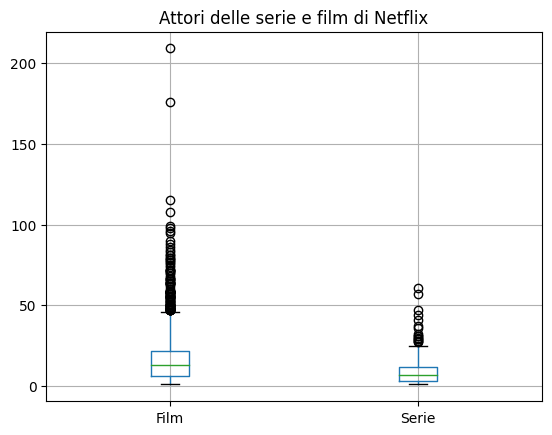

In [149]:
# Andiamo a creare una tabella contentente gli attori sia delle serie che dei film, lo facciamo salvandoci in una tabella i soli film e in un'altra le serie.
# andiamo poi a rinominare la colonna "cast_number" perché altrimenti hanno lo stesso nome e non va bene.
netflix_movies = netflix_titles_combinata[netflix_titles_combinata['type_x'] == 'MOVIE']
netflix_movies = netflix_movies.rename(columns={'cast_number': 'num_actors_film'})
netflix_actors = netflix_movies[['num_actors_film']]

netflix_serie = netflix_titles_combinata[netflix_titles_combinata['type_x'] == 'SHOW']
netflix_serie = netflix_serie.rename(columns={'cast_number': 'num_actors_show'})

# Reimpostiamo l'indice dei DataFrame, così lo risistemiamo 
netflix_actors = netflix_actors.reset_index(drop=True)
netflix_serie = netflix_serie.reset_index(drop=True)


netflix_actors['num_actors_show'] = netflix_serie['num_actors_show']

# Creiamo un boxplot per la distribuzione del numero di attori
grafico = netflix_actors.boxplot(column=['num_actors_film', 'num_actors_show'])
grafico.set_xticklabels(['Film', 'Serie'])
grafico.set_title('Attori delle serie e film di Netflix')

# Statistiche dei dati
print("Statistiche dei dati:")
print(netflix_actors.describe())


Il boxplot qui sopra rapprsenta la distribuzione del numero degli attori nei film e nelle serie tv per la piattaforma Netflix. Dai dati che abbiamo ottenuto qui sopra possiamo capire che abbiamoun totale di 18554 film e 801 serie tv. 

Dal grafico e dai dati forniti possiamo capire che:
- In ogni film partecipano mediamente 17 attori meentre per le serie Tv circa 8,5 questo sta a significare che per quanto riguarda Netflix solitamente partecipano più attori hai film rispetto che alle serie Tv

- La deviazioen standard e di circa 16,4 per i film mentre per le serie tv corrsponde a 7, da questo possiamo capire che la dstribuzione del numero di attori nei film è più lontana dalla media rispetto e quindi più spapagliato rispetto alle serie tv che invece sono più vicine alla media. Questo lo si può vedere anche dall'immagine
- La mediano per i film è di 13 attori mentre per le seire è di 7.
- Il 75% dei film ha meno di 22 attore, mentre le serie Tv ne hanno meno di 12
- il numero massimo di attori per un film è di 209 mentre per la serie tv è di 61.

Inconclusione possiamo capire che il numero medio di attori che patcipa ad una serie tv e ad un film è diverso. tuttavia possiamo dire che in entrampbi i casi c'è una notevole variazone del numero degli attori, e anche il minimo e massimo sono differenti.

Statistiche dei dati:
       num_actors_film  num_actors_show
count      2408.000000       250.000000
mean         14.001246         8.440000
std          12.399274         6.275982
min           1.000000         1.000000
25%           6.000000         4.000000
50%          11.000000         7.000000
75%          18.000000        12.000000
max         137.000000        32.000000


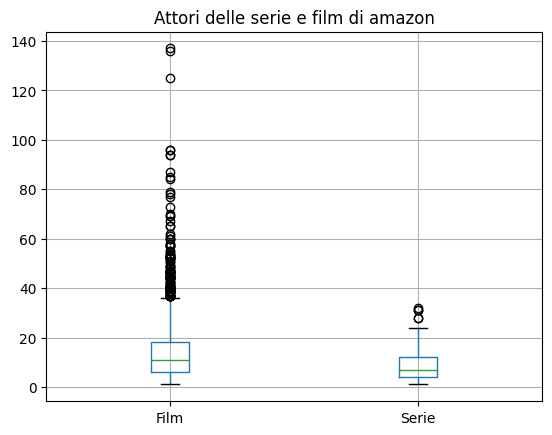

In [150]:
# Andiamo a creare una tabella contentente gli attori sia delle serie che dei film, lo facciamo salvandoci in una tabella i soli film e in un'altra le serie.
# andiamo poi a rinominare la colonna "cast_number" perché altrimenti hanno lo stesso nome e non va bene.
amazon_movies = amazon_titles_combinata[amazon_titles_combinata['type_x'] == 'MOVIE']
amazon_movies = amazon_movies.rename(columns={'cast_number': 'num_actors_film'})
amazon_actors = amazon_movies[['num_actors_film']]

# Creiamo una tabella con le sole serie
amazon_serie = amazon_titles_combinata[amazon_titles_combinata['type_x'] == 'SHOW']
amazon_serie = amazon_serie.rename(columns={'cast_number': 'num_actors_show'})

# Reimpostiamo l'indice dei DataFrame, così facendo l'indice parte da zero
amazon_actors = amazon_actors.reset_index(drop=True)
amazon_serie = amazon_serie.reset_index(drop=True)

# Assegniamo i valori alla colonna 'num_actors_show' di 'amazon_actors'
amazon_actors['num_actors_show'] = amazon_serie['num_actors_show']

# Creiamo un boxplot per la distribuzione del numero di attori
grafico = amazon_actors.boxplot(column=['num_actors_film', 'num_actors_show'])
grafico.set_xticklabels(['Film', 'Serie'])
grafico.set_title('Attori delle serie e film di amazon')

# Statistiche dei dati
print("Statistiche dei dati:")
print(amazon_actors.describe())


Il boxplot qui sopra rapprsenta la distribuzione del numero degli attori nei film e nelle serie tv per la piattaforma Amazon. Dai dati che abbiamo ottenuto qui sopra possiamo capire che abbiamoun totale di 2408 film e 250 serie tv. 

Dal grafico e dai dati forniti possiamo capire che:
- In ogni film partecipano mediamente 14 attori meentre per le serie Tv circa 8,4 questo sta a significare che per quanto riguarda Amazon solitamente partecipano più attori ai film rispetto che alle serie Tv

- La deviazioen standard e di circa 12,3 per i film mentre per le serie tv corrsponde a 6,2 , da questo possiamo capire che la dstribuzione del numero di attori nei film è più lontana dalla media rispetto e quindi più spapagliato rispetto alle serie tv che invece sono più vicine alla media. Questo lo si può vedere anche dall'immagine
- La mediana per i film è di 11 attori mentre per le seire è di 7.
- Il 75% dei film ha meno di 18 attori, mentre le serie Tv ne hanno meno di 12
- il numero massimo di attori per un film è di 137 mentre per la serie tv è di 32.

In conclusione possiamo capire che il numero medio di attori che patcipa ad una serie tv e ad un film è diverso. Tuttavia possiamo dire che in entrambi i casi c'è una notevole variazone del numero degli attori, e anche il minimo e massimo sono differenti.

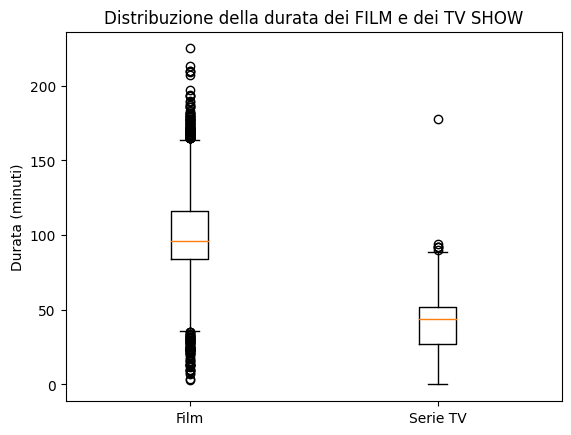

Statistiche dei dati per i FILM:
count    4262.000000
mean       99.439934
std        29.871335
min         3.000000
25%        84.000000
50%        96.000000
75%       116.000000
max       225.000000
Name: runtime, dtype: float64

Statistiche dei dati per le Serie TV:
count    1051.000000
mean       42.252141
std        16.836304
min         0.000000
25%        27.000000
50%        44.000000
75%        52.000000
max       178.000000
Name: runtime, dtype: float64


In [151]:
# Selezionamo solo i record di tipo "Movie"
netflix_film = netflix_titles_combinata[netflix_titles_combinata['type_x'] == 'MOVIE']
amazon_movie = amazon_titles_combinata[amazon_titles_combinata['type_x'] == 'MOVIE']
#andiamo ad unire i movie
movie= pd.concat([netflix_film,amazon_movie])
# Selezionamo solo i record di tipo "TV Show"
netflix_show = netflix_titles_combinata[netflix_titles_combinata['type_x'] == 'SHOW']
amazon_show = amazon_titles_combinata[amazon_titles_combinata['type_x'] == 'SHOW']
show= pd.concat([netflix_show,amazon_show])

# Creiamo il boxplot per la durata dei film
boxplot = plt.boxplot([movie['runtime'], show['runtime']])
plt.title("Distribuzione della durata dei FILM e dei TV SHOW")
plt.ylabel("Durata (minuti)")
plt.xticks([1, 2], ['Film', 'Serie TV'])

plt.show()

# Calcoliamo le statistiche dei dati
print("Statistiche dei dati per i FILM:")
print(movie['runtime'].describe())
print()
print("Statistiche dei dati per le Serie TV:")
print(show['runtime'].describe())



questo boxplot va a rappresentare la distrubizione del numero di aattori per filme serie tv, andando però ad unire le 2 piattaforme. Abbiamo un totale di 4262 film e 1051 serie tv.
Dal grafico e dai dati che otteniamo possiamo capire che: 

- La media degli attori che parttecipano hai film è di circa 99 mentre per le serie yv è di circa 42,2. Ciò significa che haifilm partecipano mediamnete più attori rispetto alle serie tv.
- La deviazione standard per i film è di circa 2,8 mentre per le serie è di circa 16,8, da uesto possiamo dedurre che la distribuzione del numeor degli attori è più ispersa rispetto alle serie tv.
- il 25% dei fil, hanno meno di 84 attori, mentre le seire tv ne hanno meno di 27.
- La mediana dei film corrisponde a 96 attori menre per le serie corrispnde a 44 attori.
- il 75% dei film ha meno di 116 atori, mentre le serie tv ne hanno meno di 52.
- Il numeromssimo di attori per un film è di 225, mentre per le serie è di 178  in entrambi i casi possiamo notare che ci sono produzioni con un grande numero di attori.

Sia dai dati che otteniamo che  dai grafici possiamo capire che i film tendono ad avere un numero maggiore di attori rispetto alle seire tv  

### 4.Test statistici

Verificare con un test statistico se la distribuzione del numero di attori in TV SHOW e FILM è diversa tenendo separate le piattaforme, e poi riunendo tutto per un unico test statistico

Verificare con un test statistico se la distribuzione della durata dei FILM e TV SHOW sulla prima piattaforma che stai analizzando è diversa da quella della seconda, tenendo prima separati i dati dalle due piattaforme e poi riunendo tutto per un unico test statistico

NB Abbiamo deciso di fare un t-test in quanto riteniamo siamo il miglior test statistico da svolgere in base alla tesi a verificare e i dati che abbiamo a disposizione. 
Questo perché il t-test va confrontare le medie delle due distribuzioni, cosa che invece con altri test (come il chi-quadrato) non viene fatta.

In [152]:
import scipy.stats as stats
# Calcoliamo la somma di tutti gli elementi della classe "Film"
sum_movies = netflix_movies['num_actors_film'].sum()

# Calcoliamo la somma di tutti gli elementi della classe "Serie"
sum_series = netflix_serie['num_actors_show'].sum()

# stampiamo gli elementi delle due classi
print("Totale attori Film:", sum_movies)
print("Totale attori Serie:", sum_series)



Totale attori Film: 31892
Totale attori Serie: 6761


Abbiamo verificato che le condizioni necessarie per effettuare il t-test.
Infatti le condizioni per effettuare il t-test sono:
1. Campione con numero di elementi n > 30;
2. Popolazione N almeno dieci volte superiore al campione N > 10*n.

Scegliamo un livello di significatività di 0.05 (intervallo di confidenza di 0.95). 


Ipotesi nulla:

H0 = le medie di attori di SHOW e MOVIE non sono statisticamente diverse;



Ipotesi alternativa:

HA = le medie sono diverse.


significatività = 0.05

In [153]:
t, p_value = stats.ttest_ind(netflix_movies['num_actors_film'], netflix_serie['num_actors_show'])

print('t:', t)
print('p_value:', p_value)


t: 14.531197168513776
p_value: 4.3215462765106505e-46


siccome il p-value << significatività; deduciamo che possiamo rigettare l'ipotesi nulla in favore di quella alternativa.

Verifichiamo ora che la media degli attori delle serie tv sia più bassa rispetto a quella dei film. Dobbiamo usare il t-test ad una coda. 

Scegliamo un livello di significatività di 0.05 (intervallo di confidenza di 0.95).

Ipotesi nulla:

H0 = La media degli attori delle serie tv è maggiore o uguale rispetto a quella dei film.

Ipotesi alternativa:

HA = La media degli attori delle serie tv è minore rispetto a quella dei film.

significatività = 0.05

In [154]:
t, p_value = stats.ttest_ind(netflix_movies['num_actors_film'], netflix_serie['num_actors_show'], alternative='greater')

print('t:', t)
print('p_value:', p_value)


t: 14.531197168513776
p_value: 2.1607731382553252e-46


Dato che il p-value è molto basso, possiamo rifiutare l'ipotesi nulla ed affermare che la media degli attori delle serie tv è nettamente inferiore a quella dei film.

Andiamo comunque a fare un'ulteriore verifica:
 

In [155]:
t, p_value = stats.ttest_ind(netflix_movies['num_actors_film'], netflix_serie['num_actors_show'], alternative='less')

print('t:', t)
print('p_value:', p_value)


t: 14.531197168513776
p_value: 1.0


-------------------------------------------------

In [156]:
# per lo stesso motivo di Neflix, applichiamo quanto già fatto ad Amazon


# Calcoliamo la somma di tutti gli elementi della classe "Film"
sum_movies = amazon_movies['num_actors_film'].sum()

# Calcoliamo la somma di tutti gli elementi della classe "Serie"
sum_series = amazon_serie['num_actors_show'].sum()

# stampiamo gli elementi delle due classi
print("Totale attori Film:", sum_movies)
print("Totale attori Serie:", sum_series)

Totale attori Film: 33715
Totale attori Serie: 2110


Abbiamo verificato che le condizioni necessarie per effettuare il t-test.
Infatti le condizioni per effettuare il t-test sono:
1. Campione con numero di elementi n > 30;
2. Popolazione N almeno dieci volte superiore al campione N > 10*n.

Scegliamo un livello di significatività di 0.05 (intervallo di confidenza di 0.95). 


Ipotesi nulla:

H0 = le medie di attori di SHOW e MOVIE sono non statisticamente diverse;



Ipotesi alternativa:

HA = le medie sono diverse.


significatività = 0.05

In [157]:
# andiamo a fare il t-test sul numero di attori dei film e delle serie tv di Amazon
t, p_value = stats.ttest_ind(amazon_movies['num_actors_film'], amazon_serie['num_actors_show'])

print('t:', t)
print('p_value:', p_value)


t: 6.998298743769593
p_value: 3.267736863415369e-12


siccome il p-value << significatività; deduciamo che possiamo rigettare l'ipotesi nulla in favore di quella alternativa.
Verifichiamo ora che la media degli attori delle serie tv sia più bassa rispetto a quella dei film. Dobbiamo usare il t-test ad una coda. 

Scegliamo un livello di significatività di 0.05 (intervallo di confidenza di 0.95).

Ipotesi nulla:

H0 = La media degli attori delle serie tv è maggiore o uguale rispetto a quella dei film.

Ipotesi alternativa:

HA = La media degli attori delle serie tv è minore rispetto a quella dei film.

significatività = 0.05

In [158]:
t,p_value = stats.ttest_ind(amazon_movies['num_actors_film'], amazon_serie['num_actors_show'], alternative= "greater")
print(p_value)

1.6338684317076844e-12


Dato che il p-value è molto basso, possiamo rifiutare l'ipotesi nulla ed affermare che la media degli attori delle serie tv è nettamente inferiore a quella dei film.

Andiamo comunque a fare un'ulteriore verifica:


In [159]:
t,p_value = stats.ttest_ind(amazon_movies['num_actors_film'], amazon_serie['num_actors_show'], alternative= "less")
print(p_value)

0.9999999999983662


Adesso applichiamo il test statistico indipendentemente dalla piattaforma, andiamo quindi ad unire i dati delle due piattaforme.


In [160]:
serie_tv= pd.concat([netflix_serie,amazon_serie])
film = pd.concat([netflix_movies,amazon_movies])

serie_tv.info()
film.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1051 entries, 0 to 249
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1051 non-null   object        
 1   title              1051 non-null   object        
 2   type_x             1051 non-null   object        
 3   description_x      1045 non-null   object        
 4   release_year       1051 non-null   int64         
 5   age_certification  823 non-null    object        
 6   runtime            1051 non-null   int64         
 7   seasons            1051 non-null   float64       
 8   imdb_id            954 non-null    object        
 9   imdb_score         944 non-null    float64       
 10  imdb_votes         944 non-null    float64       
 11  tmdb_popularity    1051 non-null   float64       
 12  tmdb_score         1015 non-null   float64       
 13  country            1051 non-null   object        
 14  date_adde

In [161]:
# per lo stesso motivo usato per le piattaforme separate, applichiamo quanto già fatto alle piattaforme unite

# Calcoliamo la somma di tutti gli elementi della classe "Film"
sum_movies = film['num_actors_film'].sum()

# Calcoliamo la somma di tutti gli elementi della classe "Serie"
sum_series = serie_tv['num_actors_show'].sum()

# stampiamo gli elementi delle due classi
print("Totale attori Film:", sum_movies)
print("Totale attori Serie:", sum_series)


Totale attori Film: 65607
Totale attori Serie: 8871


Abbiamo verificato che le condizioni necessarie per effettuare il t-test.
Infatti le condizioni per effettuare il t-test sono:
1. Campione con numero di elementi n > 30;
2. Popolazione N almeno dieci volte superiore al campione N > 10*n.

Scegliamo un livello di significatività di 0.05 (intervallo di confidenza di 0.95). 


Ipotesi nulla:

H0 = le medie di attori di SHOW e MOVIE non sono statisticamente diverse;



Ipotesi alternativa:

HA = le medie sono diverse.


significatività = 0.05

In [162]:
t,p_value = stats.ttest_ind(film['num_actors_film'],serie_tv['num_actors_show'])

print(t)
print(p_value)

15.256387065664144
1.817682226864352e-51


siccome il p-value << significatività; deduciamo che possiamo rigettare l'ipotesi nulla in favore di quella alternativa.

Verifichiamo ora che la media degli attori delle serie tv sia più bassa rispetto a quella dei film. Dobbiamo usare il t-test ad una coda. 

Scegliamo un livello di significatività di 0.05 (intervallo di confidenza di 0.95).

Ipotesi nulla:

H0 = La media degli attori delle serie tv è maggiore o uguale rispetto a quella dei film.

Ipotesi alternativa:

HA = La media degli attori delle serie tv è minore rispetto a quella dei film.

significatività = 0.05

In [163]:
t, p_value = stats.ttest_ind(film['num_actors_film'], serie_tv['num_actors_show'], alternative='greater')

print('t:', t)
print('p_value:', p_value)

t: 15.256387065664144
p_value: 9.08841113432176e-52


Dato che il p-value è molto basso, possiamo rifiutare l'ipotesi nulla ed affermare che la media degli attori delle serie tv è nettamente inferiore a quella dei film.

Andiamo comunque a fare un'ulteriore verifica:


In [164]:
t, p_value = stats.ttest_ind(film['num_actors_film'], serie_tv['num_actors_show'], alternative= "less")
print(p_value)

1.0


Anche per il secondo punto utilizziamo un t-test.

In quanto le serie tv hanno un minutaggio a puntata ma non abbiamo il numero di episodi andremo a fare il test statistico in base al minutaggio di una singola puntata per serie tv.

In [165]:
#prima di tutto stampiamo gli elementi delle due classi
netflix_film['runtime'].info()



<class 'pandas.core.series.Series'>
Int64Index: 1854 entries, 0 to 38649
Series name: runtime
Non-Null Count  Dtype
--------------  -----
1854 non-null   int64
dtypes: int64(1)
memory usage: 29.0 KB


In [166]:
netflix_show['runtime'].info()

<class 'pandas.core.series.Series'>
Int64Index: 801 entries, 252 to 38648
Series name: runtime
Non-Null Count  Dtype
--------------  -----
801 non-null    int64
dtypes: int64(1)
memory usage: 12.5 KB


In entrambe le tabelle il runtime in entrambe le tabelle é espresso in minuti, quindi confronteremo il runtime

Abbiamo verificato che le condizioni necessarie per effettuare il t-test.
Infatti le condizioni per effettuare il t-test sono:
1. Campione con numero di elementi n > 30;
2. Popolazione N almeno dieci volte superiore al campione N > 10*n.

Scegliamo un livello di significatività di 0.05 (intervallo di confidenza di 0.95). 


Ipotesi nulla:

H0 = Le medie della durata di SHOW e MOVIE non sono statisticamente diverse;

Ipotesi alternativa:

HA = le medie sono diverse.


significatività = 0.05

In [167]:
t, p_value = stats.ttest_ind(netflix_film['runtime'], netflix_show['runtime'])

print('t:', t)
print('p_value:', p_value)



t: 48.797850624466626
p_value: 0.0


siccome il p-value << significatività; deduciamo che possiamo rigettare l'ipotesi nulla in favore di quella alternativa.

Verifichiamo ora che la media della durata delle serie tv sia più bassa rispetto a quella dei film. Dobbiamo usare il t-test ad una coda. 

Scegliamo un livello di significatività di 0.05 (intervallo di confidenza di 0.95).

Ipotesi nulla:

H0 = La media della durata delle serie tv è maggiore o uguale rispetto a quella dei film.

Ipotesi alternativa:

HA = La media della delle serie tv è minore rispetto a quella dei film.

significatività = 0.05


In [168]:

t, p_value = stats.ttest_ind(netflix_film['runtime'], netflix_show['runtime'], alternative= "greater")

print('p_value: ', p_value)


p_value:  0.0


Dato che il p-value è molto basso, possiamo rifiutare l'ipotesi nulla ed affermare che la media della durata delle serie tv è nettamente inferiore a quella dei film.

Andiamo comunque a fare un'ulteriore verifica:

In [169]:
t, p_value = stats.ttest_ind(netflix_film['runtime'], netflix_show['runtime'], alternative= "less")
print('p_value: ',p_value)

p_value:  1.0




Adesso facciamo lo stesso con Amazon.

Abbiamo verificato che le condizioni necessarie per effettuare il t-test.
Infatti le condizioni per effettuare il t-test sono:
1. Campione con numero di elementi n > 30;
2. Popolazione N almeno dieci volte superiore al campione N > 10*n.

Scegliamo un livello di significatività di 0.05 (intervallo di confidenza di 0.95). 


Ipotesi nulla:

H0 = Le medie della durata di SHOW e MOVIE non sono statisticamente diverse;

Ipotesi alternativa:

HA = le medie sono diverse.


significatività = 0.05

In [170]:

t, p_value = stats.ttest_ind(amazon_movie['runtime'], amazon_show['runtime'])

print('t: ', t)

print('p_value: ', p_value)


t:  31.58295454565974
p_value:  3.724863386791622e-186


siccome il p-value << significatività; deduciamo che possiamo rigettare l'ipotesi nulla in favore di quella alternativa.

Verifichiamo ora che la media della durata delle serie tv sia più bassa rispetto a quella dei film. Dobbiamo usare il t-test ad una coda. 

Scegliamo un livello di significatività di 0.05 (intervallo di confidenza di 0.95).

Ipotesi nulla:

H0 = La media della durata delle serie tv è maggiore o uguale rispetto a quella dei film.

Ipotesi alternativa:

HA = La media della delle serie tv è minore rispetto a quella dei film.

significatività = 0.05


In [171]:
t, p_value = stats.ttest_ind(amazon_movie['runtime'], amazon_show['runtime'], alternative= "greater")

print('p_value: ', p_value)


p_value:  1.862431693395811e-186


Dato che il p-value è molto basso, possiamo rifiutare l'ipotesi nulla ed affermare che la media della durata delle serie tv è nettamente inferiore a quella dei film.

Andiamo comunque a fare un'ulteriore verifica:

In [172]:
t, p_value = stats.ttest_ind(amazon_movie['runtime'], amazon_show['runtime'], alternative= "less")
print('p_value: ',p_value)

p_value:  1.0


Applichiamo come richiesto il ttest anche alle serie tv ed ai film indipendentemente dalla piattaforma.

Abbiamo verificato che le condizioni necessarie per effettuare il t-test.
Infatti le condizioni per effettuare il t-test sono:
1. Campione con numero di elementi n > 30;
2. Popolazione N almeno dieci volte superiore al campione N > 10*n.

Scegliamo un livello di significatività di 0.05 (intervallo di confidenza di 0.95). 


Ipotesi nulla:

H0 = Le medie della durata di SHOW e MOVIE non sono statisticamente diverse;

Ipotesi alternativa:

HA = le medie sono diverse.


significatività = 0.05

In [173]:
t,p_value =stats.ttest_ind(movie['runtime'], show['runtime'])

print('t: ', t)
print('p_value: ', p_value)


t:  59.76584701865479
p_value:  0.0


siccome il p-value << significatività; deduciamo che possiamo rigettare l'ipotesi nulla in favore di quella alternativa.

Verifichiamo ora che la media della durata delle serie tv sia più bassa rispetto a quella dei film. Dobbiamo usare il t-test ad una coda. 

Scegliamo un livello di significatività di 0.05 (intervallo di confidenza di 0.95).

Ipotesi nulla:

H0 = La media della durata delle serie tv è maggiore o uguale rispetto a quella dei film.

Ipotesi alternativa:

HA = La media della delle serie tv è minore rispetto a quella dei film.

significatività = 0.05

In [174]:
t,p_value =stats.ttest_ind(movie['runtime'], show['runtime'], alternative= "greater")
print('p_value: ', p_value)


p_value:  0.0


Dato che il p-value è molto basso, possiamo rifiutare l'ipotesi nulla ed affermare che la media della durata delle serie tv è nettamente inferiore a quella dei film.

Andiamo comunque a fare un'ulteriore verifica:

In [175]:
t,p_value =stats.ttest_ind(movie['runtime'], show['runtime'], alternative= "less")
print('p_value: ',p_value)

p_value:  1.0


Per verificare anche graficamente questo risultato andiamo a creare un grafico.


([<matplotlib.axis.XTick at 0x1661a2af0>,
 [Text(1, 0, 'Film'), Text(2, 0, 'Serie TV')])

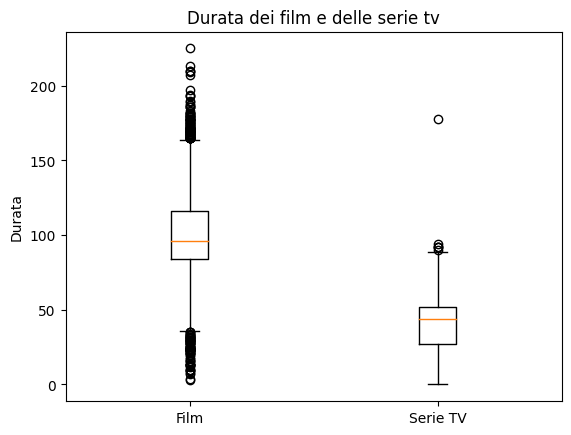

In [176]:
plt.figure()
plt.boxplot([movie['runtime'] , show['runtime']])
plt.title('Durata dei film e delle serie tv')
plt.ylabel('Durata')
plt.xticks([1, 2], ['Film', 'Serie TV'])

### 5. OLAP

Costruire una rappresentazione OLAP che conteggi i dati nelle due piattaforme raggruppando per
- Anno di caricamento sulla piattaforma
- Tipologia (TV SHOW o FILM)
- Paese di produzione

Proporre e discutere 2 visualizzazioni

#### Abbiamo riscontrato un'elevata presenza di valori nulli per amazon_titles_combinata nella colonna "date_added", andiamo quindi ad eseguire questo punto del progetto utilizzando la colonna "release_year" perché così i risultati ottenuti saranno il più possibile precisi.

In [177]:
titles_combinata = pd.concat([amazon_titles_combinata, netflix_titles_combinata]).reset_index(drop=True)
titles_combinata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5313 entries, 0 to 5312
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5313 non-null   object        
 1   title              5313 non-null   object        
 2   type_x             5313 non-null   object        
 3   description_x      5304 non-null   object        
 4   release_year       5313 non-null   int64         
 5   age_certification  2194 non-null   object        
 6   runtime            5313 non-null   int64         
 7   seasons            1051 non-null   float64       
 8   imdb_id            4930 non-null   object        
 9   imdb_score         4859 non-null   float64       
 10  imdb_votes         4852 non-null   float64       
 11  tmdb_popularity    5311 non-null   float64       
 12  tmdb_score         4876 non-null   float64       
 13  country            5313 non-null   object        
 14  date_add

Dopo il merge facendo una info vediamo che i date added sono poco piú di 38k, che corrispondono soltanto a netflix(questo lo avevamo visto anche prima), quindi per avere dei risultati piú attendibili, abbimao deciso di usare release year che che contiene piú di 74k date, che sono la somma totale dell'unione dei 2. Questo ci permetterá di fare una analisi piú accurata e con dei dati piú significativi.

Come visto nei laboratori, andiamo a quantizzare i film in base all'anno di rilascio.


In [178]:
titles_combinata.loc[titles_combinata['release_year'].between(1900,1980,'both'),'release_year_quant']='VERY OLD'
titles_combinata.loc[titles_combinata['release_year'].between(1981,2000,'both'),'release_year_quant']='OLD'
titles_combinata.loc[titles_combinata['release_year'].between(2001,2015,'both'),'release_year_quant']='RECENT'
titles_combinata.loc[titles_combinata['release_year'].between(2016,2023,'both'),'release_year_quant']='VERY RECENT'

In [179]:
titles_combinata['release_year_quant']

0          VERY OLD
1          VERY OLD
2          VERY OLD
3          VERY OLD
4          VERY OLD
           ...     
5308    VERY RECENT
5309    VERY RECENT
5310    VERY RECENT
5311    VERY RECENT
5312    VERY RECENT
Name: release_year_quant, Length: 5313, dtype: object

con questo verifichiamo che type non abbia valori nulli, all'interno di type_x abbiamo solo due tipi di valori possibili (MOVIE e SHOW) ed è già quindi quantizzato.

In [180]:
titles_combinata['type_x'].isnull().sum()

0

facciamo la stessa cosa per country, che però deve essere ancora quantizzato

In [181]:
titles_combinata['country'].isnull().sum()

0

Confrontandoci con altri studenti e parlando con i professori siamo arrivati alla conclusione che per poter mettere in atto l'OLAP dovevamo 
in qualche modo suddividere gli stati per ogni film/serie tv, abbiamo deciso quindi di creare dei macro gruppi (simil continenti ma separando Nord America dal Sud) in modo tale da ridurre gli elementi da molti a 6.

Questo lo facciamo andando a contare quanti stati appartengono ad un determinato continente per ogni film/serie, associamo poi al film/serie il continente con più stati.

In [182]:

# ci andiamo a creare un dizionario che associa ad ogni "continente" gli stati da lui contenuti
continenti = {
    'Asia': ['AF', 'AM', 'AZ', 'BH', 'BD', 'BT', 'BN', 'KH', 'CN', 'CY', 'GE', 'IN', 'ID', 'IR', 'IQ', 'IL', 'JP', 'JO', 'KZ', 'KW', 'KG', 'LA', 'LB', 'MY', 'MV', 'MN', 'MM', 'NP', 'KP', 'OM', 'PK', 'PH', 'QA', 'RU', 'SA', 'SG', 'KR', 'LK', 'SY', 'TW', 'TJ', 'TH', 'TR', 'TM', 'AE', 'UZ', 'VN', 'YE'],  
    'Africa': ['DZ', 'AO', 'BJ', 'BW', 'BF', 'BI', 'CV', 'CM', 'CF', 'TD', 'KM', 'CD', 'CG', 'DJ', 'EG', 'GQ', 'ER', 'SZ', 'ET', 'GA', 'GM', 'GH', 'GN', 'GW', 'KE', 'LS', 'LR', 'LY', 'MG', 'MW', 'ML', 'MR', 'MU', 'MA', 'MZ', 'NA', 'NE', 'NG', 'RW', 'ST', 'SN', 'SC', 'SL', 'SO', 'ZA', 'SS', 'SD', 'SZ', 'TZ', 'TG', 'TN', 'UG', 'EH', 'ZM', 'ZW'],  
    'North America': ['AG', 'BS', 'BB', 'BZ', 'CA', 'CR', 'CU', 'DM', 'DO', 'SV', 'GD', 'GT', 'HT', 'HN', 'JM', 'MX', 'NI', 'PA', 'KN', 'LC', 'VC', 'TT', 'US'],  
    'South America': ['AR', 'BO', 'BR', 'CL', 'CO', 'EC', 'GY', 'PY', 'PE', 'SR', 'UY', 'VE'],  
    'Europe': ['AL', 'AD', 'AM', 'AT', 'BY', 'BE', 'BA', 'BG', 'HR', 'CY', 'CZ', 'DK', 'EE', 'FI', 'FR', 'GE', 'DE', 'GR', 'HU', 'IS', 'IE', 'IT', 'KZ', 'XK', 'LV', 'LI', 'LT', 'LU', 'MT', 'MD', 'MC', 'ME', 'NL', 'MK', 'NO', 'PL', 'PT', 'RO', 'RU', 'SM', 'RS', 'SK', 'SI', 'ES', 'SE', 'CH', 'TR', 'UA', 'GB', 'VA'],  
    'Oceania': ['AU', 'FJ', 'KI', 'MH', 'FM', 'NR', 'NZ', 'PW', 'PG', 'WS', 'SB', 'TO', 'TV', 'VU']
}

def da_stato_a_continente(country):
    stati = eval(country)
    conto_continenti = {continente: 0 for continente in continenti.keys()} # questo è il dizionario che setta ogni continente a zero
    
    for c in stati:
        c = c.strip("'[]")
        for continente, countries in continenti.items():
            if c in countries:
                conto_continenti[continente] += 1
    
    max_cont = max(conto_continenti.values())  # troviamo il massimo
    max_continente = [continente for continente, count in conto_continenti.items() if count == max_cont]  # mi trovo i continenti con valore massimo
    
    return max_continente if max_continente else ['Unknown']  # se ho un massimo restituisco altrimenti restituisco Unknown

titles_combinata['continente'] = titles_combinata['country'].apply(da_stato_a_continente)


titles_combinata.head()

,id,title,type_x,description_x,release_year,age_certification,runtime,seasons,imdb_id,imdb_score,...,tmdb_score,country,date_added,year_added,month_added,genres_number,cast_number,director,release_year_quant,continente
0,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,NaN,tt0032599,7.8,...,7.400,['US'],NaT,NaN,NaN,3,36,Howard Hawks,VERY OLD,[North America]
1,tm88469,The Bishop's Wife,MOVIE,"An Episcopal Bishop, Henry Brougham, has been ...",1948,NaN,105,NaN,tt0039190,7.6,...,7.100,['US'],NaT,NaN,NaN,4,30,Henry Koster,VERY OLD,[North America]
2,tm82560,The Little Foxes,MOVIE,"The ruthless, moneyed Hubbard clan lives in, a...",1941,NaN,115,NaN,tt0033836,7.9,...,7.559,['US'],NaT,NaN,NaN,3,24,William Wyler,VERY OLD,[North America]
3,tm116781,My Man Godfrey,MOVIE,"Fifth Avenue socialite Irene Bullock needs a ""...",1936,NaN,95,NaN,tt0028010,8.0,...,7.560,['US'],NaT,NaN,NaN,3,44,Gregory La Cava,VERY OLD,[North America]
4,tm120863,Dodsworth,MOVIE,A retired auto manufacturer and his wife take ...,1936,NaN,101,NaN,tt0027532,7.8,...,7.200,['US'],NaT,NaN,NaN,2,41,William Wyler,VERY OLD,[North America]


In [183]:
quantize_type = ['MOVIE', 'SHOW']
quantize_country = ['Asia', 'Africa', 'North America', 'South America', 'Europe', 'Oceania']
quantize_release_year = ['VERY OLD', 'OLD', 'RECENT', 'VERY RECENT']

# ci creiamo l'OLAP con tutti zeri
OLAP = np.zeros((len(quantize_country), len(quantize_release_year), len(quantize_type)))

#ci andiamo a calcolare l'OLAP come richiesto 
for z in range(len(quantize_type)):
    tipi = titles_combinata[titles_combinata['type_x'] == quantize_type[z]]
    for j in range(len(quantize_release_year)):
        for i in range(len(quantize_country)):
            continent = quantize_country[i]
            release_year = quantize_release_year[j]
             # con "lambda" andiamo a controllare se la riga continente appartiene ad uno dei continenti e se l'anno di rilascio appartiene alle possibili che abbiamo creato
            OLAP[i, j, z] = np.sum(tipi.apply(lambda row: continent in row['continente'] and row['release_year_quant'] == release_year,axis=1))

Come visto nei laboratori e consigliato dal prof andiamo a fare le due visualizzazioni richieste attraverso uno slicing ed un dicing.

Andiamo a fare uno slicing dell'olap ottenuto concentrandoci sul Nord America

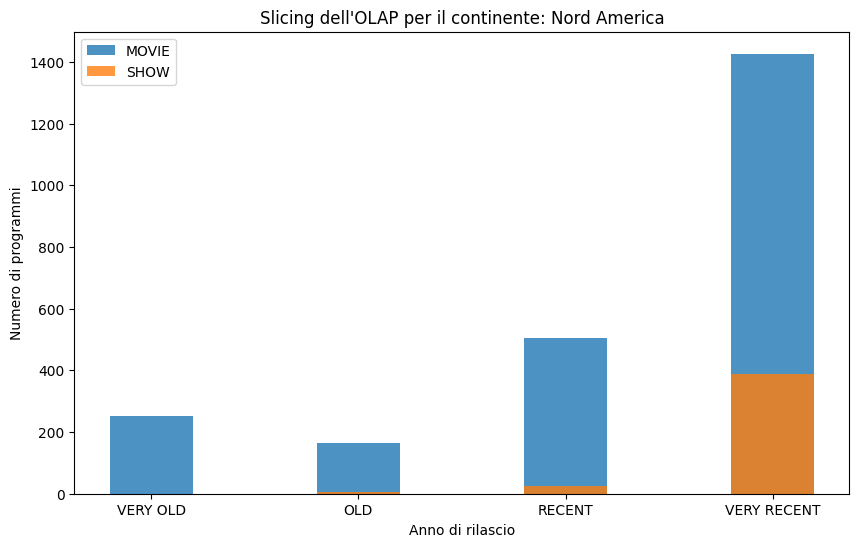

In [184]:

slicing = OLAP[2, :, :]

x_labels = quantize_release_year
y_labels = quantize_type

#Andiamo a vedere lo slicing in modo grafico
plt.figure(figsize=(10, 6))
bar_width = 0.4

for i in range(len(y_labels)):
    plt.bar(
        range(len(x_labels)),
        slicing[:, i],
        width=bar_width,
        label=y_labels[i],
        align='center',
        alpha=0.8
    )

plt.xticks(range(len(x_labels)), x_labels)
plt.xlabel('Anno di rilascio')
plt.ylabel('Numero di programmi')
plt.title('Slicing dell\'OLAP per il continente: Nord America')
plt.legend()

plt.show()


Andiamo a visualizzare un dicing concentrandoci sui film

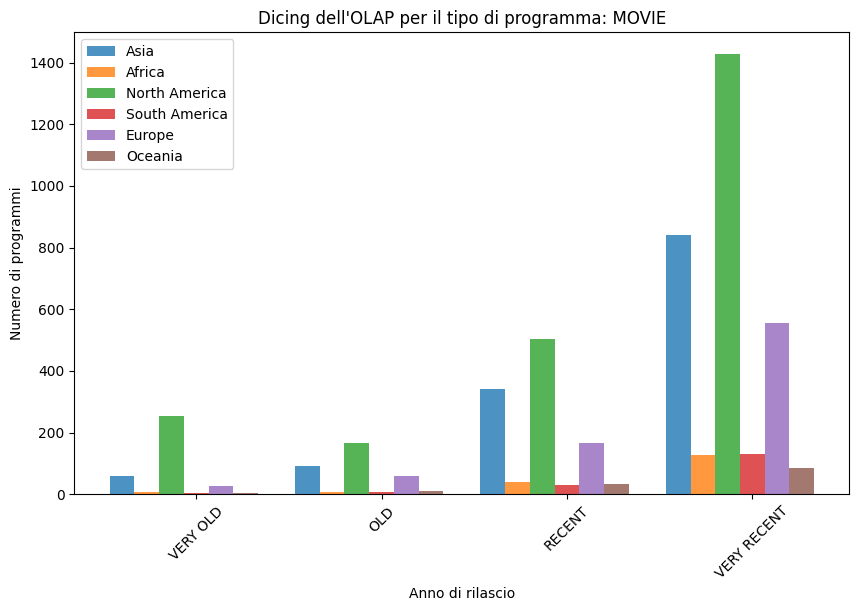

In [185]:
dicing = OLAP[:, :, 0]

x_labels = quantize_release_year
y_labels = quantize_country

#Andiamo a vedere lo dicing in modo grafico
plt.figure(figsize=(10, 6))
bar_width = 0.8 / len(y_labels)
index = np.arange(len(x_labels))

for i in range(len(y_labels)):
    plt.bar(
        index + i * bar_width,
        dicing[i, :],
        bar_width,
        label=y_labels[i],
        align='center',
        alpha=0.8
    )

plt.xlabel('Anno di rilascio')
plt.ylabel('Numero di programmi')
plt.title('Dicing dell\'OLAP per il tipo di programma: ' + quantize_type[0])
plt.xticks(index + (bar_width * len(y_labels)) / 2, x_labels, rotation=45)
plt.legend()

plt.show()


In [186]:
titles_combinata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5313 entries, 0 to 5312
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  5313 non-null   object        
 1   title               5313 non-null   object        
 2   type_x              5313 non-null   object        
 3   description_x       5304 non-null   object        
 4   release_year        5313 non-null   int64         
 5   age_certification   2194 non-null   object        
 6   runtime             5313 non-null   int64         
 7   seasons             1051 non-null   float64       
 8   imdb_id             4930 non-null   object        
 9   imdb_score          4859 non-null   float64       
 10  imdb_votes          4852 non-null   float64       
 11  tmdb_popularity     5311 non-null   float64       
 12  tmdb_score          4876 non-null   float64       
 13  country             5313 non-null   object      

## 6. Metodi predittivi

Costruire un descrittore composto da

- type
- imdb_score
- tmdbs_score
-  tmdbs_popularity
-  runtime


Applicare K-Means per individuare eventuali gruppi coerenti tra i dati. 

Calcolare l'indice di Silhouette per individuare il numero migliore di cluster.

Applicare PCA per poter visualizzare i dati, colorando ogni campione secondo l'appartenenza ad uno dei cluster.
Verificare cosa succede tenendo i dati separati per piattaforma.

In [187]:
print(titles_combinata['runtime'])

0        92
1       105
2       115
3        95
4       101
       ... 
5308     30
5309     89
5310     32
5311     23
5312     81
Name: runtime, Length: 5313, dtype: int64


Il numero ottimale di cluster è: 2
Il valore di Silhouette è:: 0.4650070224411148


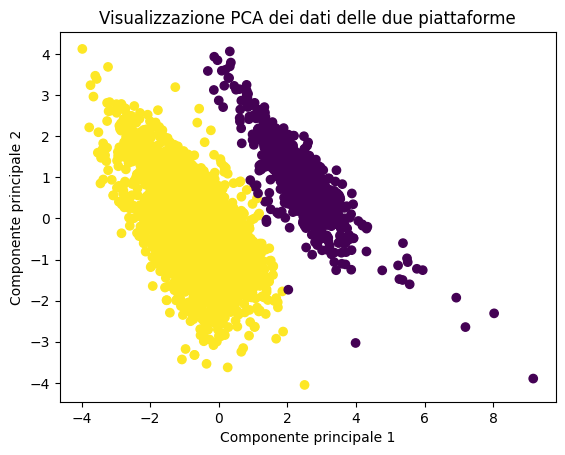

In [188]:
# prima di tutto importiamo le librerie necessarie
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# ci creiamo il descrittore con le colonne richieste
descrittore = titles_combinata[['type_x', 'imdb_score', 'tmdb_score', 'tmdb_popularity', 'runtime']]

# per sicurezza togliamo gli eventuali valori nulli
descrittore = descrittore.dropna()

# andiamo a sostituire il valore in type_x in modo che MOVIE diventi 0 e SHOW 1 attraverso una funzione, altrimenti non potremmo applicare K-Means
def fromType_to_number(dataset):
    dataset['type_x'] = dataset['type_x'].apply(lambda x: 0 if x == 'MOVIE' else 1)
    return dataset

descrittore = fromType_to_number(descrittore)

# Andiamo ad applicare la normalizzazione ai dati, così facendo dovrebbe risultare un K-Means più uniforme
scaler = StandardScaler()
dati_normalizzati = scaler.fit_transform(descrittore)

# Andiamo ad applicare K-Means per trovare il numero ottimale di cluster, fatto ciò andiamo poi ad applicarlo
k_values = range(2,10)  # Valori di k da testare
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(dati_normalizzati)
    silhouette_scores.append(silhouette_score(dati_normalizzati, cluster_labels))

# Trova il numero di cluster con il valore massimo di Silhouette score
k_migliore = k_values[np.argmax(silhouette_scores)]
silhuette_migliore = max(silhouette_scores)

print("Il numero ottimale di cluster è:", k_migliore)
print("Il valore di Silhouette è::", silhuette_migliore)

kmeans = KMeans(n_clusters=k_migliore, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(dati_normalizzati)

# Andiamo poi ad applicare il PCA
pca = PCA(n_components=2)
dati_ridotti = pca.fit_transform(dati_normalizzati)

# Crea un grafico con i dati ridotti dalla PCA e colorali in base all'appartenenza ai cluster
plt.scatter(dati_ridotti[:, 0], dati_ridotti[:, 1], c=cluster_labels)
plt.xlabel("Componente principale 1")
plt.ylabel("Componente principale 2")
plt.title("Visualizzazione PCA dei dati delle due piattaforme")
plt.show()


Abbiamo trovato che il numero di cluster ottimale è 2, il set di dati sembra essere suddivisibile in due gruppi coerenti.

L'indice di Silhouette è una metrica utilizzata per valutare la coerenza dei cluster. Varia tra -1 e 1, più i valori sono vicini a 1 più significa che i campioni all'interno di un cluster sono molto simili tra loro, mentre invece più i valori sono vicini a -1 più significa che i campioni potrebbero essere stati assegnati erroneamente a un cluster. Un valore di Silhouette score di 0 indica che i campioni si sovrappongono tra i cluster.

Il nostro valore si Silhouette è 0.46500702244109404. 
Questo ci suggerisce che i campioni sono raggruppati in modo coerente all'interno dei due cluster identificati. 

Tuttavia, poiché il valore di Silhouette è meno di 1, potrebbe esserci una sovrapposizione o ambiguità nella suddivisione dei campioni in cluster.

###Rifacciamo quanto visto sopra ma con le piattaforme separate

Il numero ottimale di cluster è: 2
Il valore di Silhouette è: 0.42803780495987365


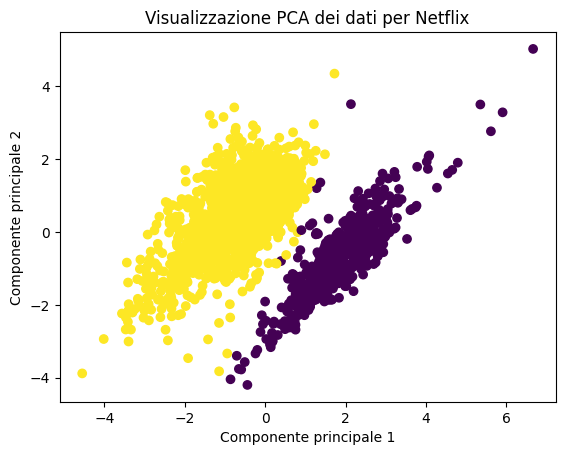

In [189]:
# ci creiamo il descrittore con le colonne richieste
descrittore = netflix_titles_combinata[['type_x', 'imdb_score', 'tmdb_score', 'tmdb_popularity', 'runtime']]

# per sicurezza togliamo gli eventuali valori nulli
descrittore = descrittore.dropna()

# andiamo a sostituire il valore in type_x in modo che MOVIE diventi 0 e SHOW 1 attraverso una funzione, altrimenti non potremmo applicare K-Means
def fromType_to_number(dataset):
    dataset['type_x'] = dataset['type_x'].apply(lambda x: 0 if x == 'MOVIE' else 1)
    return dataset

descrittore = fromType_to_number(descrittore)

# Andiamo ad applicare la normalizzazione ai dati, così facendo dovrebbe risultare un K-Means più uniforme
scaler = StandardScaler()
dati_normalizzati = scaler.fit_transform(descrittore)

# Andiamo ad applicare K-Means per trovare il numero ottimale di cluster, fatto ciò andiamo poi ad applicarlo
k_values = range(2,10)  # Valori di k da testare
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(dati_normalizzati)
    silhouette_scores.append(silhouette_score(dati_normalizzati, cluster_labels))

# Trova il numero di cluster con il valore massimo di Silhouette score
k_migliore = k_values[np.argmax(silhouette_scores)]
silhuette_migliore = max(silhouette_scores)

print("Il numero ottimale di cluster è:", k_migliore)
print("Il valore di Silhouette è:", silhuette_migliore)

kmeans = KMeans(n_clusters=k_migliore, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(dati_normalizzati)

# Andiamo poi ad applicare il PCA
pca = PCA(n_components=2)
dati_ridotti = pca.fit_transform(dati_normalizzati)

# Crea un grafico con i dati ridotti dalla PCA e colorali in base all'appartenenza ai cluster
plt.scatter(dati_ridotti[:, 0], dati_ridotti[:, 1], c=cluster_labels)
plt.xlabel("Componente principale 1")
plt.ylabel("Componente principale 2")
plt.title("Visualizzazione PCA dei dati per Netflix")
plt.show()


Abbiamo trovato che il numero di cluster ottimale è 2, il set di dati sembra essere suddivisibile in due gruppi coerenti.

L'indice di Silhouette è una metrica utilizzata per valutare la coerenza dei cluster. Varia tra -1 e 1, più i valori sono vicini a 1 più significa che i campioni all'interno di un cluster sono molto simili tra loro, mentre invece più i valori sono vicini a -1 più significa che i campioni potrebbero essere stati assegnati erroneamente a un cluster. Un valore di Silhouette score di 0 indica che i campioni si sovrappongono tra i cluster.

Il nostro valore si Silhouette è 0.42803780495987365. 
Questo ci suggerisce che i campioni sono raggruppati in modo coerente all'interno dei due cluster identificati. 

Tuttavia, poiché il valore di Silhouette è meno di 1, potrebbe esserci una sovrapposizione o ambiguità nella suddivisione dei campioni in cluster.

Il numero ottimale di cluster è: 2
Il valore di Silhouette è: 0.5523818455931788


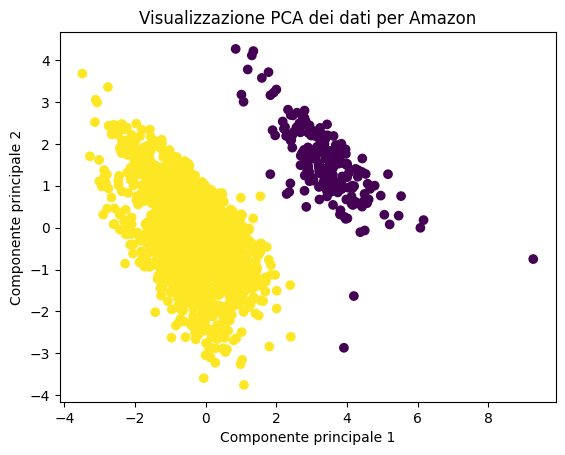

In [190]:
# ci creiamo il descrittore con le colonne richieste
descrittore = amazon_titles_combinata[['type_x', 'imdb_score', 'tmdb_score', 'tmdb_popularity', 'runtime']]

# per sicurezza togliamo gli eventuali valori nulli
descrittore = descrittore.dropna()

# andiamo a sostituire il valore in type_x in modo che MOVIE diventi 0 e SHOW 1 attraverso una funzione, altrimenti non potremmo applicare K-Means
def fromType_to_number(dataset):
    dataset['type_x'] = dataset['type_x'].apply(lambda x: 0 if x == 'MOVIE' else 1)
    return dataset

descrittore = fromType_to_number(descrittore)

# Andiamo ad applicare la normalizzazione ai dati, così facendo dovrebbe risultare un K-Means più uniforme
scaler = StandardScaler()
dati_normalizzati = scaler.fit_transform(descrittore)

# Andiamo ad applicare K-Means per trovare il numero ottimale di cluster, fatto ciò andiamo poi ad applicarlo
k_values = range(2,10)  # Valori di k da testare
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(dati_normalizzati)
    silhouette_scores.append(silhouette_score(dati_normalizzati, cluster_labels))

# Trova il numero di cluster con il valore massimo di Silhouette score
k_migliore = k_values[np.argmax(silhouette_scores)]
silhuette_migliore = max(silhouette_scores)

print("Il numero ottimale di cluster è:", k_migliore)
print("Il valore di Silhouette è:", silhuette_migliore)

kmeans = KMeans(n_clusters=k_migliore, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(dati_normalizzati)

# Andiamo poi ad applicare il PCA
pca = PCA(n_components=2)
dati_ridotti = pca.fit_transform(dati_normalizzati)

# Crea un grafico con i dati ridotti dalla PCA e colorali in base all'appartenenza ai cluster
plt.scatter(dati_ridotti[:, 0], dati_ridotti[:, 1], c=cluster_labels)
plt.xlabel("Componente principale 1")
plt.ylabel("Componente principale 2")
plt.title("Visualizzazione PCA dei dati per Amazon")
plt.show()


Abbiamo calcolato l'indice di Silhouette per valutare la coerenza dei cluster ottenuti. L'indice di Silhouette varia tra -1 e 1, dove valori più vicini a 1 indicano una maggiore coerenza all'interno dei cluster. Un valore di Silhouette pari a 0 indica una sovrapposizione tra i cluster.

Nel nostro caso, l'indice di Silhouette è 0.5523818455931788. Questo valore suggerisce che i campioni all'interno dei cluster sono raggruppati in modo coerente, ma potrebbe ancora esserci una leggera sovrapposizione o ambiguità nella suddivisione dei campioni.

In conclusione, i risultati indicano che i due cluster identificati hanno una certa coerenza, ma potrebbe essere necessario ulteriormente esaminare e affinare l'algoritmo di clustering per ottenere una suddivisione più definita dei campioni.